In [2]:
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

Data Processing 

In [4]:
path = "C:/Users/user/Downloads/train.csv"
df = pd.read_csv(path)
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
# Remove id and hospital number column
df = df.drop(['id','hospital_number'], axis=1)
df.head()




,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [6]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [7]:
print(df.dtypes)

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get unique values from the column
    unique_values = df[column].unique()
    # Print the column name and its unique values
    print(f"Column '{column}' has unique values: {unique_values}")

# Checking for missing values in the dataset
missing_data = df.isnull().sum()
missing_data 


surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object
Column 'surgery' has unique values: ['yes' 'no']
Column 'age' has unique values: ['adult' 'youn

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [8]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [9]:
# Replace 'none' in any case with NaN across the DataFrame using a case-insensitive regex
df.replace(to_replace=[r'(?i)^none$'], value=np.nan, regex=True, inplace=True)

# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention     235
nasogastric_tube         355
nasogastric_reflux       352
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64


In [10]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


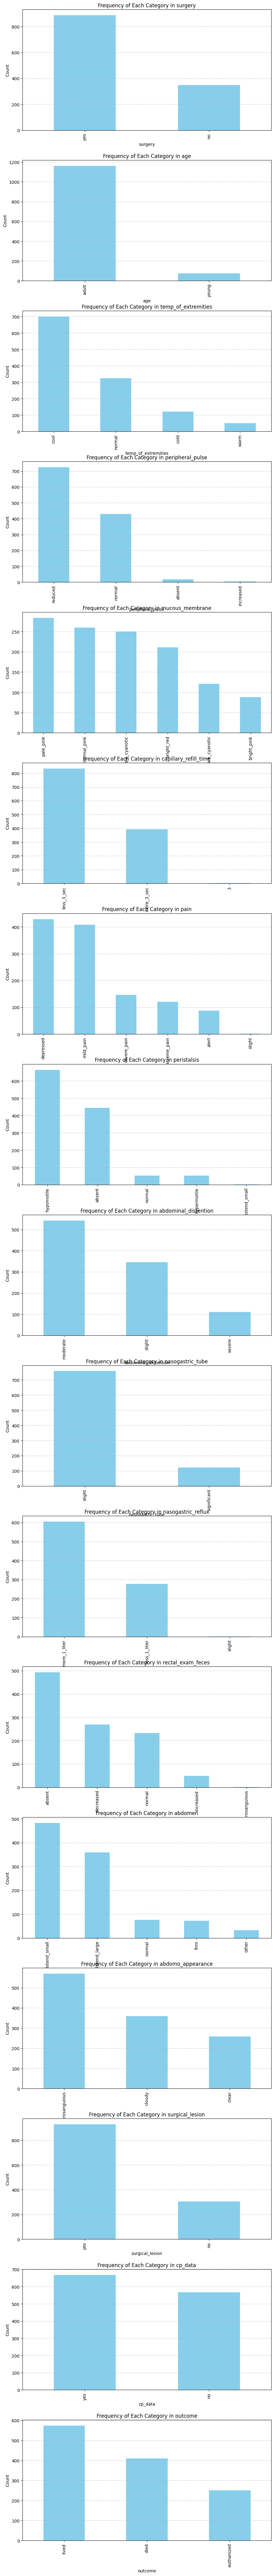

In [11]:
# Select columns of type 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the plotting
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))
fig.tight_layout(pad=5.0)

# Check if there's only one categorical column, handle subplot axes indexing
if len(categorical_columns) == 1:
    axes = [axes]  # Make it iterable

# Loop through each categorical column, plotting its value counts
for ax, column in zip(axes, categorical_columns):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Frequency of Each Category in {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [12]:
# Iterate over each column in the DataFrame



for column in df.select_dtypes(include='object').columns:
  df[column] = df[column].astype('category')

# Identify categorical columns excluding the target variable 'outcome'
categorical_cols = df.select_dtypes(include=['category']).columns.drop('outcome')

print(categorical_cols)

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns= categorical_cols)


# Ensure the target 'outcome' is kept as a categorical type and not encoded
df['outcome'] = df['outcome'].astype('category')

# Display the new DataFrame to verify changes
df_encoded.head()


Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data'],
      dtype='object')


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,...,False,False,False,False,False,True,False,True,True,False
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,...,False,False,False,False,False,True,False,True,True,False
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,...,False,False,False,False,False,True,False,True,True,False
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,...,False,False,False,False,True,False,False,True,False,True
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,...,False,True,False,False,True,False,True,False,False,True


In [13]:
# Adjust display settings to show more information
pd.set_option('display.max_rows', None)  # To display all rows if necessary
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.width', None)  # To remove limit on the display width

#Check the data types of the new DataFrame
print(df_encoded.dtypes)


rectal_temp                          float64
pulse                                float64
respiratory_rate                     float64
nasogastric_reflux_ph                float64
packed_cell_volume                   float64
total_protein                        float64
abdomo_protein                       float64
lesion_1                               int64
lesion_2                               int64
lesion_3                               int64
outcome                             category
surgery_no                              bool
surgery_yes                             bool
age_adult                               bool
age_young                               bool
temp_of_extremities_cold                bool
temp_of_extremities_cool                bool
temp_of_extremities_normal              bool
temp_of_extremities_warm                bool
peripheral_pulse_absent                 bool
peripheral_pulse_increased              bool
peripheral_pulse_normal                 bool
peripheral

In [14]:
#Scale numercial variables
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns (int64 and float64)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = MinMaxScaler() 

# Scale the numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df = df_encoded
df.head()


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,peristalsis_absent,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_slight,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,0.500000,0.662338,0.181818,0.846154,0.653846,0.058480,0.33,0.053734,0.0,0.0,died,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
1,0.388889,0.376623,0.045455,0.153846,0.192308,0.707602,0.19,0.053710,0.0,0.0,euthanized,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
2,0.537037,0.584416,0.227273,0.384615,0.269231,0.033918,0.33,0.124641,0.0,0.0,lived,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False
3,0.314815,0.272727,0.250000,0.153846,0.576923,0.040936,0.38,0.053710,0.0,0.0,lived,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True
4,0.481481,0.142857,0.454545,0.923077,0.461538,0.044444,0.25,0.000000,0.0,0.0,lived,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True


Feature Selection

Feature importance by random forest

                             feature  importance
1                              pulse    0.084213
5                      total_protein    0.077086
3              nasogastric_reflux_ph    0.069260
6                     abdomo_protein    0.065868
4                 packed_cell_volume    0.061680
7                           lesion_1    0.050545
0                        rectal_temp    0.048194
2                   respiratory_rate    0.044991
34                    pain_mild_pain    0.026891
62   abdomo_appearance_serosanguious    0.021243
35                  pain_severe_pain    0.018397
21          peripheral_pulse_reduced    0.015317
63                surgical_lesion_no    0.015022
50          rectal_exam_feces_absent    0.014986
25       mucous_membrane_normal_pink    0.014676
20           peripheral_pulse_normal    0.014398
29  capillary_refill_time_less_3_sec    0.013850
60           abdomo_appearance_clear    0.013676
48   nasogastric_reflux_more_1_liter    0.013473
16        temp_of_ex

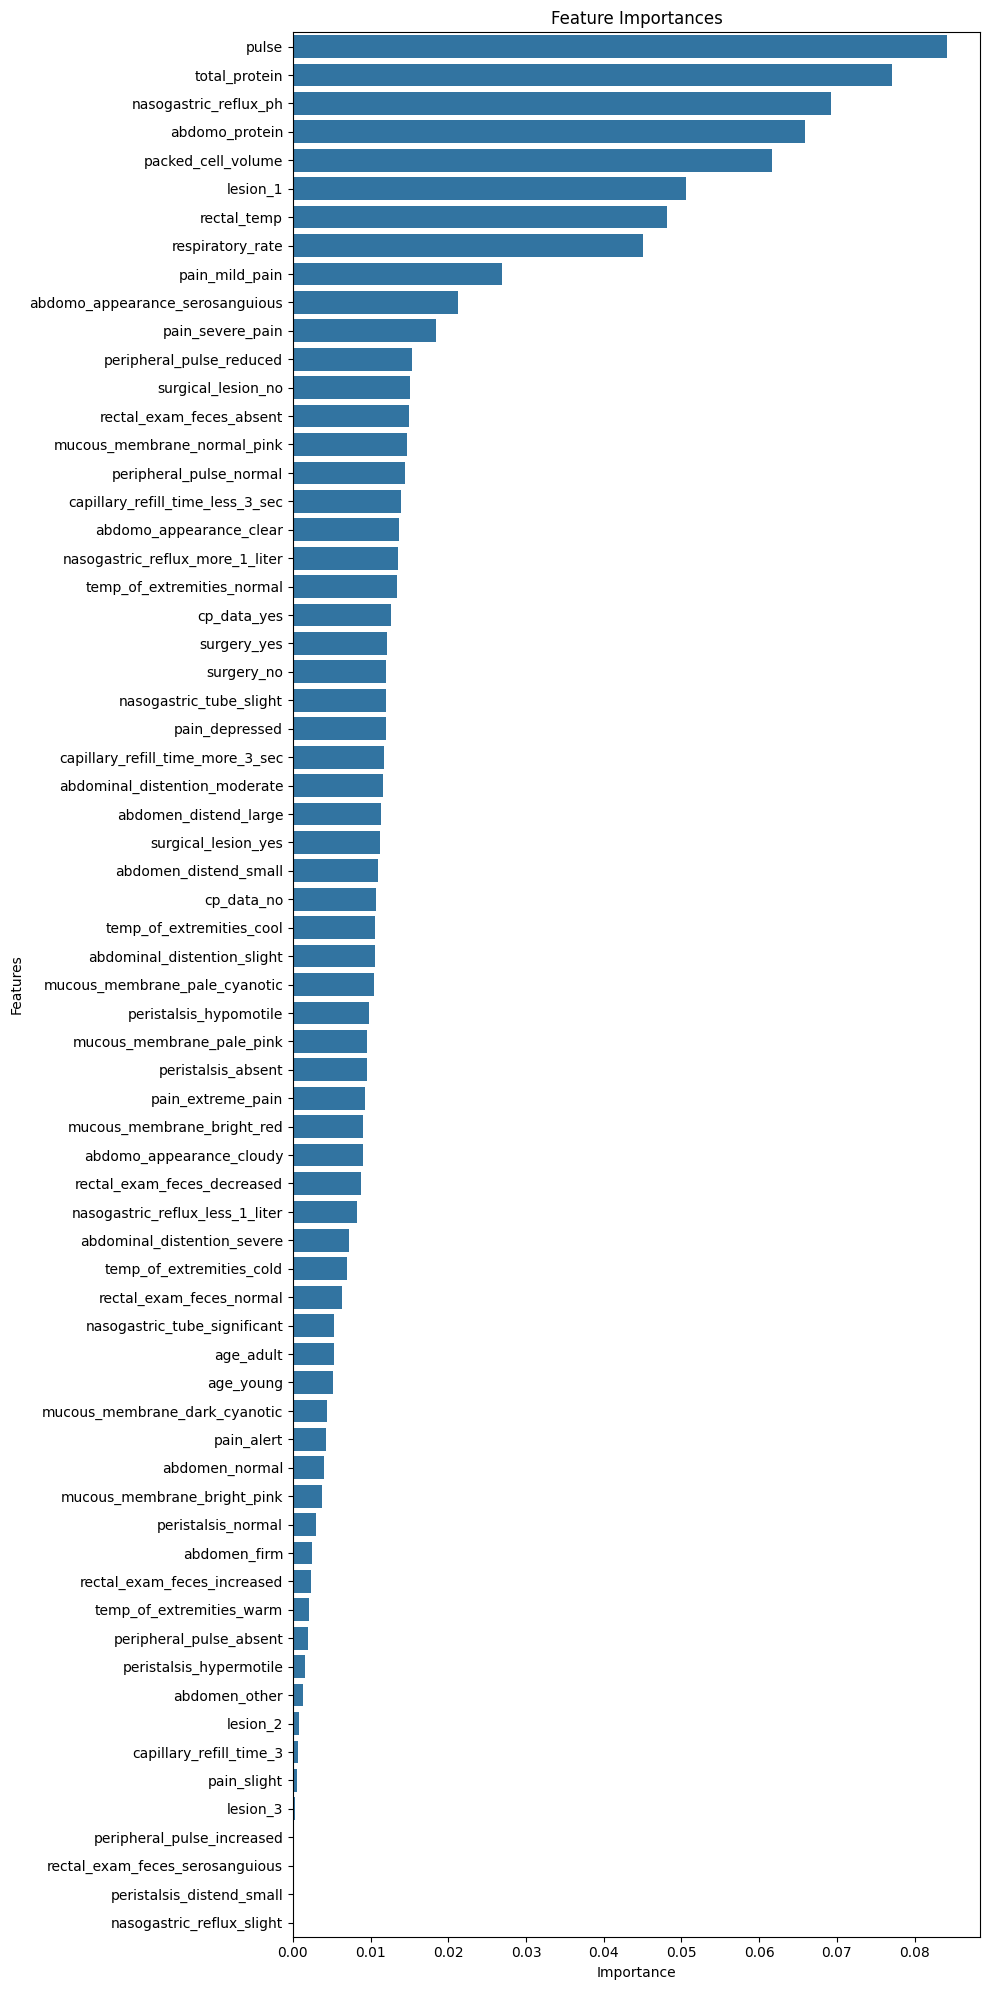

In [15]:
from sklearn.ensemble import RandomForestClassifier
import random

X = df.drop('outcome', axis=1)
y = df['outcome']

#random.seed(234567)
random.seed(42)
np.random.seed(42)

# Train a model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

plt.figure(figsize=(10, 20))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate the bars with the importance values
for index, value in enumerate(feature_importances['importance']):
    ax.text(value, index, f'{value:.4f}', va='center')  # Display importance value on the bar

plt.tight_layout()
plt.show()

# Select the top N features (e.g., top 25 features)
#top_n_features = 25
#selected_features_rf = feature_importances['feature'].head(top_n_features)

# Create a new DataFrame with only the selected features
#df_selected_features_rf = df[selected_features_rf].copy()
#df_selected_features_rf['outcome'] = y  # Add the target variable to the new DataFrame

# Display the new DataFrame to verify
#print("New DataFrame with Random Forest Selected Features (df_selected_features_rf):")
#print(df_selected_features_rf.head())
#print("\nShape of df_selected_features_rf:", df_selected_features_rf.shape)
#print("\nColumns in df_selected_features_rf:", df_selected_features_rf.columns.tolist())

Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns='outcome')
y = df['outcome']


random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFE with the number of features to select (e.g., 10 most important features)
rfe = RFE(estimator=rf, n_features_to_select=25)

# Fit the RFE model
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the RandomForest model with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")


Selected Features: Index(['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1',
       'surgery_yes', 'temp_of_extremities_cool', 'peripheral_pulse_reduced',
       'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec',
       'pain_mild_pain', 'pain_severe_pain', 'abdominal_distention_moderate',
       'nasogastric_tube_slight', 'nasogastric_reflux_more_1_liter',
       'rectal_exam_feces_absent', 'abdomen_distend_large',
       'abdomo_appearance_clear', 'abdomo_appearance_serosanguious',
       'surgical_lesion_no', 'surgical_lesion_yes', 'cp_data_no'],
      dtype='object')
Accuracy with selected features: 0.7358


In [17]:
# Create a new DataFrame with only the selected features for future use
df_selected_features_rfe = df[selected_features]
df_selected_features_rfe['outcome'] = y  # Add the target variable to the new DataFrame

df_selected_features_rfe.head()

C:\Users\user\AppData\Local\Temp\ipykernel_88972\344335985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features_rfe['outcome'] = y  # Add the target variable to the new DataFrame


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,temp_of_extremities_cool,peripheral_pulse_reduced,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_mild_pain,pain_severe_pain,abdominal_distention_moderate,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,rectal_exam_feces_absent,abdomen_distend_large,abdomo_appearance_clear,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,outcome
0,0.500000,0.662338,0.181818,0.846154,0.653846,0.058480,0.33,0.053734,True,True,True,False,True,False,False,False,True,False,False,False,False,True,False,True,True,died
1,0.388889,0.376623,0.045455,0.153846,0.192308,0.707602,0.19,0.053710,True,True,False,False,True,True,False,True,False,True,True,False,False,True,False,True,True,euthanized
2,0.537037,0.584416,0.227273,0.384615,0.269231,0.033918,0.33,0.124641,True,True,True,True,False,False,False,True,True,False,False,True,False,True,False,True,True,lived
3,0.314815,0.272727,0.250000,0.153846,0.576923,0.040936,0.38,0.053710,True,False,True,False,True,True,False,True,True,True,False,False,False,False,False,True,False,lived
4,0.481481,0.142857,0.454545,0.923077,0.461538,0.044444,0.25,0.000000,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,lived


CatBoost

In [18]:
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
original_df = "C:/Users/user/Downloads/train.csv"
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (assuming 'df' is a pandas DataFrame and 'outcome' is the target variable)
X = df.drop(columns='outcome')  # Features
y = df['outcome']  # Target

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the column indices of categorical features (optional)
categorical_features_indices = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

# Initialize CatBoostClassifier
# catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, 
#                                    cat_features=categorical_features_indices, verbose=100)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6, 
                                    cat_features=categorical_features_indices, verbose=100)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get feature importance scores from the CatBoost model
catboost_importances = catboost_model.get_feature_importance()

# Create a DataFrame with features and their importance scores
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': catboost_importances
})

# Sort features by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print("CatBoost Selected Features and their Importance Scores:")
print(feature_importances)

0:	learn: 1.0936990	total: 154ms	remaining: 2m 33s
100:	learn: 0.8219915	total: 709ms	remaining: 6.31s
200:	learn: 0.7129675	total: 1.14s	remaining: 4.53s
300:	learn: 0.6475615	total: 1.6s	remaining: 3.71s
400:	learn: 0.6017777	total: 2.02s	remaining: 3.02s
500:	learn: 0.5664203	total: 2.45s	remaining: 2.44s
600:	learn: 0.5348092	total: 2.89s	remaining: 1.92s
700:	learn: 0.5071371	total: 3.39s	remaining: 1.45s
800:	learn: 0.4811407	total: 3.92s	remaining: 973ms
900:	learn: 0.4569972	total: 4.37s	remaining: 481ms
999:	learn: 0.4336993	total: 4.86s	remaining: 0us
Accuracy: 0.7385
CatBoost Selected Features and their Importance Scores:
                             feature  importance
5                      total_protein   11.511418
6                     abdomo_protein    7.989325
1                              pulse    7.358117
3              nasogastric_reflux_ph    6.800837
7                           lesion_1    5.779359
4                 packed_cell_volume    5.128174
2               

In [20]:
# Select the top N features (e.g., top 25 most important features)
top_n_features = 25
selected_features_catboost = feature_importances['feature'].head(top_n_features)

# Create a new DataFrame with only the selected features
df_selected_features_catboost = df[selected_features_catboost].copy()
df_selected_features_catboost['outcome'] = y  # Add the target variable to the new DataFrame

# Display the new DataFrame to verify
print("New DataFrame with CatBoost Selected Features (df_selected_features_catboost):")
print(df_selected_features_catboost.head())
print("\nShape of df_selected_features_catboost:", df_selected_features_catboost.shape)
print("\nColumns in df_selected_features_catboost:", df_selected_features_catboost.columns.tolist())

New DataFrame with CatBoost Selected Features (df_selected_features_catboost):
   total_protein  abdomo_protein     pulse  nasogastric_reflux_ph  lesion_1  \
0       0.058480            0.33  0.662338               0.846154  0.053734   
1       0.707602            0.19  0.376623               0.153846  0.053710   
2       0.033918            0.33  0.584416               0.384615  0.124641   
3       0.040936            0.38  0.272727               0.153846  0.053710   
4       0.044444            0.25  0.142857               0.923077  0.000000   

   packed_cell_volume  respiratory_rate  pain_mild_pain  rectal_temp  \
0            0.653846          0.181818           False     0.500000   
1            0.192308          0.045455            True     0.388889   
2            0.269231          0.227273           False     0.537037   
3            0.576923          0.250000            True     0.314815   
4            0.461538          0.454545           False     0.481481   

   pain_sever

Rank features and choose top N 

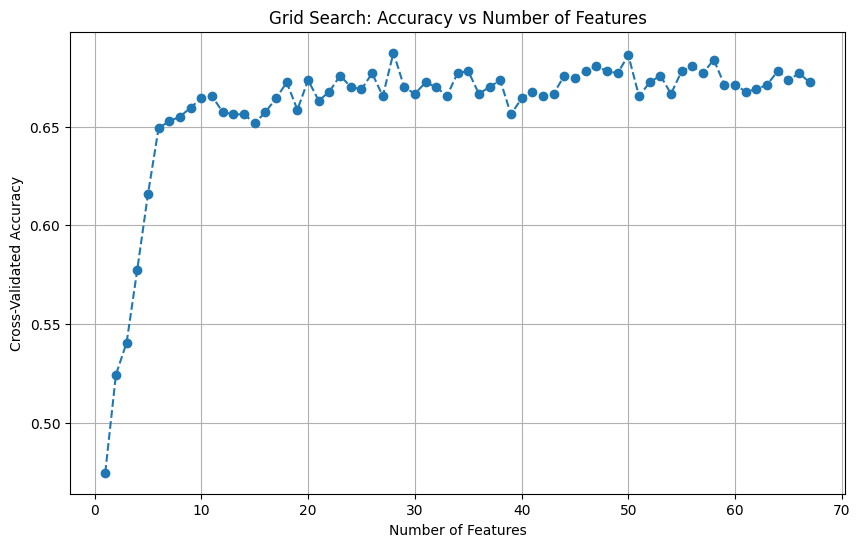

Optimal number of features: 28
Selected features: ['rectal_temp' 'pulse' 'respiratory_rate' 'nasogastric_reflux_ph'
 'packed_cell_volume' 'total_protein' 'abdomo_protein' 'lesion_1'
 'surgery_yes' 'temp_of_extremities_cool' 'peripheral_pulse_reduced'
 'capillary_refill_time_less_3_sec' 'capillary_refill_time_more_3_sec'
 'pain_mild_pain' 'pain_severe_pain' 'abdominal_distention_moderate'
 'nasogastric_tube_slight' 'nasogastric_reflux_more_1_liter'
 'rectal_exam_feces_absent' 'abdomen_distend_large'
 'abdomo_appearance_clear' 'abdomo_appearance_serosanguious'
 'surgical_lesion_no' 'surgical_lesion_yes' 'cp_data_no'
 'mucous_membrane_normal_pink' 'peripheral_pulse_normal'
 'temp_of_extremities_normal']
Accuracy with selected features: 0.7089


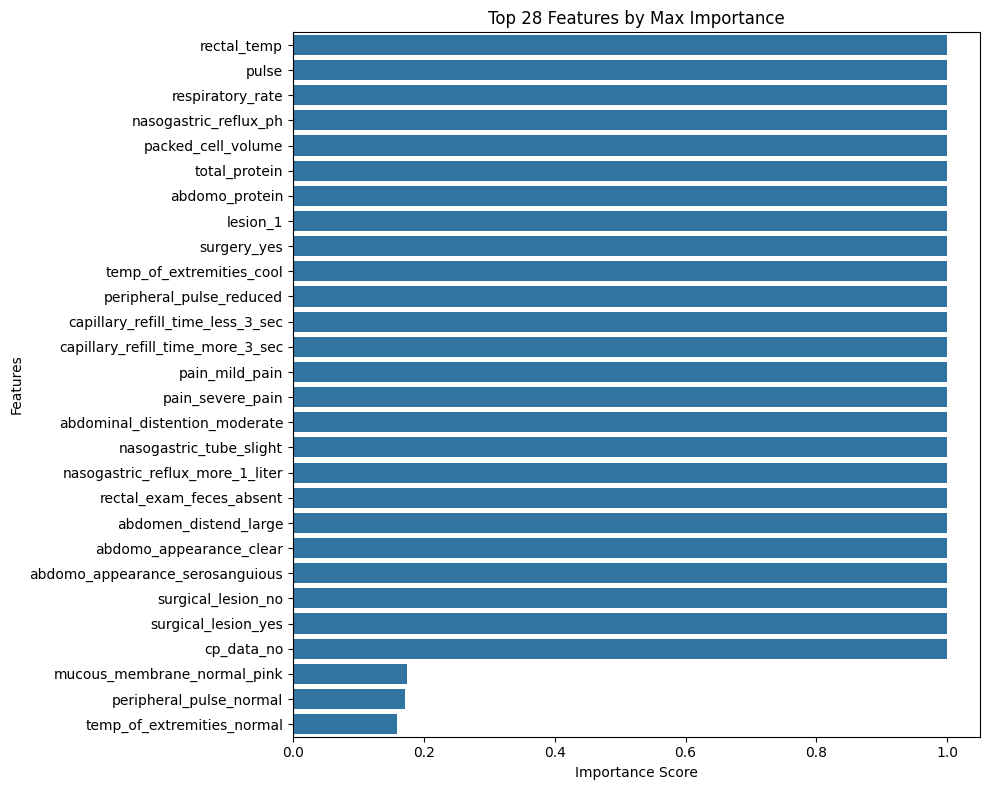

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score


# Step 1: Prepare data (split into training and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine feature importance results into a DataFrame
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': model.feature_importances_,
    'rfe_importance': np.where(rfe.support_, 1, 0),
    'catboost_importance': catboost_model.get_feature_importance()
})

# Standardize feature importance scores (scale between 0 and 1)
scaler = MinMaxScaler()
feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']] = scaler.fit_transform(
    feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']]
)

# Step 2: Grid search to find the optimal number of features
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Store results for accuracy and the corresponding number of features
accuracies = []
num_features_list = []

# Step 3: Test model performance with top N features based on individual importance methods
for N in range(1, len(feature_importances) + 1):
    # Sort features based on the maximum importance score across methods
    feature_importances['max_importance'] = feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']].max(axis=1)
    top_features = feature_importances.nlargest(N, 'max_importance')['feature']
    
    # Select only the top N features from the training data
    X_train_selected = X_train[top_features]
    
    # Perform cross-validation to evaluate the accuracy with the top N features
    cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Store the results
    accuracies.append(mean_cv_score)
    num_features_list.append(N)

# Step 4: Plot Accuracy vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracies, marker='o', linestyle='--')
plt.title('Grid Search: Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Step 5: Choose the optimal number of features (based on max accuracy)
optimal_num_features = num_features_list[np.argmax(accuracies)]
print(f"Optimal number of features: {optimal_num_features}")

# Select the optimal features based on max importance
top_features_optimal = feature_importances.nlargest(optimal_num_features, 'max_importance')['feature']
print(f"Selected features: {top_features_optimal.values}")

# Step 6: Train RandomForest using only the selected optimal number of features
X_train_selected = X_train[top_features_optimal]
X_test_selected = X_test[top_features_optimal]

# Fit the model
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions and validate the model
y_pred = rf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Step 7: Visualize the top selected features' importance scores
plt.figure(figsize=(10, 8))
sns.barplot(x='max_importance', y='feature', data=feature_importances.nlargest(optimal_num_features, 'max_importance'))
plt.title(f'Top {optimal_num_features} Features by Max Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()




In [22]:
# Select the top features from the original dataset
df_selected_features = df[top_features_optimal]

#df_selected_features = df[top_features_15]

df_selected_features['outcome'] = df['outcome']

df_selected_features.head()

C:\Users\user\AppData\Local\Temp\ipykernel_88972\3626179516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['outcome'] = df['outcome']


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,temp_of_extremities_cool,peripheral_pulse_reduced,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_mild_pain,pain_severe_pain,abdominal_distention_moderate,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,rectal_exam_feces_absent,abdomen_distend_large,abdomo_appearance_clear,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,mucous_membrane_normal_pink,peripheral_pulse_normal,temp_of_extremities_normal,outcome
0,0.500000,0.662338,0.181818,0.846154,0.653846,0.058480,0.33,0.053734,True,True,True,False,True,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,died
1,0.388889,0.376623,0.045455,0.153846,0.192308,0.707602,0.19,0.053710,True,True,False,False,True,True,False,True,False,True,True,False,False,True,False,True,True,False,True,False,euthanized
2,0.537037,0.584416,0.227273,0.384615,0.269231,0.033918,0.33,0.124641,True,True,True,True,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,False,lived
3,0.314815,0.272727,0.250000,0.153846,0.576923,0.040936,0.38,0.053710,True,False,True,False,True,True,False,True,True,True,False,False,False,False,False,True,False,False,False,False,lived
4,0.481481,0.142857,0.454545,0.923077,0.461538,0.044444,0.25,0.000000,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,True,lived


Machine Learning Models

Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = df_selected_features.drop(columns=['outcome'])  
y = df_selected_features['outcome'] 

# Standardize the feature data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

random.seed(42)
np.random.seed(42)

# Generate polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
#X_poly = poly.fit_transform(X_scaled)

# Split the dataset into training and testing sets (70% train, 30% test)
#X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['newton-cg', 'lbfgs', 'saga']
}

# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42), 
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Polynomial Features: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report with Polynomial Features:")
print(classification_report(y_test, y_pred))

# Cross-validated accuracy for a better estimate
# cv_scores = cross_val_score(best_model, X_poly, y, cv=5, scoring='accuracy')
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Mean Cross-Validated Accuracy with Polynomial Features: {cv_scores.mean():.4f}")




C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

Accuracy with Polynomial Features: 0.6846
Classification Report with Polynomial Features:
              precision    recall  f1-score   support

        died       0.60      0.75      0.67       110
  euthanized       0.75      0.48      0.58        82
       lived       0.73      0.74      0.73       179

    accuracy                           0.68       371
   macro avg       0.69      0.66      0.66       371
weighted avg       0.70      0.68      0.68       371

Mean Cross-Validated Accuracy with Polynomial Features: 0.6785


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

SVM

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for SVM)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the SVM model
# Here we use a linear kernel, but we can optimize this later using GridSearchCV
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Step 3: Train the SVM model
#svm_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
#y_pred = svm_model.predict(X_test_scaled)
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6712
Classification Report:
              precision    recall  f1-score   support

        died       0.58      0.75      0.65       110
  euthanized       0.73      0.44      0.55        82
       lived       0.72      0.73      0.73       179

    accuracy                           0.67       371
   macro avg       0.68      0.64      0.64       371
weighted avg       0.68      0.67      0.67       371



KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Feature Scaling (important for KNN)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the KNN model
# Start with k=5 (you can tune this later)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN model
#knn_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
#y_pred = knn_model.predict(X_test_scaled)
y_pred = knn_model.predict(X_test)


# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6388
Classification Report:
              precision    recall  f1-score   support

        died       0.51      0.67      0.58       110
  euthanized       0.65      0.40      0.50        82
       lived       0.75      0.73      0.74       179

    accuracy                           0.64       371
   macro avg       0.63      0.60      0.60       371
weighted avg       0.65      0.64      0.64       371



Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Random Forest model
# You can start with default parameters and tune them later
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7089
Classification Report:
              precision    recall  f1-score   support

        died       0.61      0.70      0.65       110
  euthanized       0.79      0.61      0.69        82
       lived       0.75      0.76      0.76       179

    accuracy                           0.71       371
   macro avg       0.72      0.69      0.70       371
weighted avg       0.72      0.71      0.71       371



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Random Forest model
# You can start with default parameters and tune them later

class_weights = {'died': 3.0, 'euthanized': 2.5, 'lived': 1.0}  # Adjust weights as needed

# Step 2: Initialize the Random Forest model with custom class weights
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# rf_model = RandomForestClassifier(random_state=42)

# Step 3: Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7385
Classification Report:
              precision    recall  f1-score   support

        died       0.67      0.74      0.70       110
  euthanized       0.84      0.57      0.68        82
       lived       0.75      0.82      0.78       179

    accuracy                           0.74       371
   macro avg       0.75      0.71      0.72       371
weighted avg       0.75      0.74      0.74       371



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Feature Scaling (optional for RandomForest, but useful for comparison with other models)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





# Step 2: Initialize RandomForestClassifier with hyperparameter tuning
#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees
#    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
#    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#    'bootstrap': [True, False]        # Method of selecting samples for training each tree
#}


#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees
#    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
#    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#    'bootstrap': [True, False],       # Method of selecting samples for training each tree
#    'class_weight': [
#        {'died': 1.5, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 2.0, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 2.5, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 3.0, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 2.0, 'euthanized': 1.2, 'lived': 0.8},
#        {'died': 2.0, 'euthanized': 1.5, 'lived': 1.0}
#    ]
#}

param_grid = {
    'n_estimators': [500],  # Number of trees
    
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True],       # Method of selecting samples for training each tree
    'class_weight': [
        {'died': 3.0, 'euthanized': 2.5, 'lived': 1.0},
        #{'died': 2.5, 'euthanized': 1.5, 'lived': 1.0},
        #{'died': 2.5, 'euthanized': 2.0, 'lived': 1.0},
        #{'died': 2.5, 'euthanized': 2.5, 'lived': 1.0}
    ]
    
}


# GridSearchCV for hyperparameter tuning
# Define a custom class weight dictionary




# rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Step 3: Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Step 4: Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Cross-validation (for more reliable accuracy estimate)
cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy: 0.7412
Classification Report:
              precision    recall  f1-score   support

        died       0.66      0.74      0.70       110
  euthanized       0.84      0.60      0.70        82
       lived       0.76      0.81      0.78       179

    accuracy                           0.74       371
   macro avg       0.76      0.71      0.73       371
weighted avg       0.75      0.74      0.74       371

Cross-Validated Accuracy: 0.7029 ± 0.0444


In [238]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import random
 

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Encode string labels in y to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Now y_encoded contains numeric labels


# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grids for each model
rf_param_grid = {
    'n_estimators': [500],
    'min_samples_split': [2], 
    #'max_depth': [None, 20],
    #'min_samples_split': [5, 10],
    'min_samples_leaf': [1],
    'class_weight': [{'died': 3.0, 'euthanized': 2.5, 'lived': 1.0}]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]  # Adjusting for class imbalance
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearchCV for each model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Train each model
print("Tuning Random Forest...")
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

print("\nTuning Gradient Boosting...")
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)

print("\nTuning XGBoost...")
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

# Step 4: Evaluate each model on the test set
models = {
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model,
    'XGBoost': best_xgb_model
}



for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    
    # Decode predictions back to original labels for readability
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)
    
    # Calculate accuracy and display classification report
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_labels, y_pred_labels))
    
    # Cross-validation for a more reliable accuracy estimate
    cv_scores = cross_val_score(model, X, y_encoded, cv=10, scoring='accuracy')
    print(f"Cross-Validated Accuracy for {model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Tuning Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Random Forest: {'class_weight': {'died': 3.0, 'euthanized': 2.5, 'lived': 1.0}, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Tuning Gradient Boosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Tuning XGBoost...
Fitting 5 folds for each of 64 candidates, totalling 320 fits


ValueError: 
All the 320 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['died' 'euthanized' 'lived']


Neural Network 

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Features
y = df_selected_features['outcome']  # Target

random.seed(42)
np.random.seed(42)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encoding for neural network output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Step 2: Define Neural Network Architecture
model = Sequential([
    Dense(units = 30, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    #BatchNormalization(),  # Normalize layer inputs
    # Dense(256, activation='relu'),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    
    
    #Dropout(0.4),  # Adjust dropout for regularization
    #BatchNormalization(),
    #Dense(128, activation='relu'),
    #Dropout(0.3),
    #BatchNormalization(),
    #Dense(64, activation='relu'),
    #Dropout(0.2),
    #BatchNormalization(),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer


])

# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model with Early Stopping and Class Weights
# Calculate class weights to emphasize the "euthanized" class
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

# Manually adjust class weights (increase weight for "euthanized" class)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict[1] *= 1.5  # Increase weight for "euthanized" class

#early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)




weight_combinations = [
    {0: 2.5, 1: 2.5, 2: 1.0},
    #{0: 1.0, 1: 3.0, 2: 1.0},
    #{0: 1.0, 1: 1.5, 2: 1.5},
]



for weights in weight_combinations:
    print(f"Testing with weights: {weights}")
    history = model.fit(
        X_train, y_train,
        epochs=1000,  # Maximum epochs
        batch_size=32,  # Optimized batch size
        validation_split=0.3,  # Use 20% of training data for validation
        # class_weight=class_weights_dict,  # Apply class weights
        class_weight=weights, 
        #callbacks=[early_stopping],  # Early stopping callback
        verbose=1
    )

    # Step 5: Evaluate the Model
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
    y_test_labels = np.argmax(y_test, axis=1)

    # Decode predictions back to original labels for readability
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels_decoded = label_encoder.inverse_transform(y_test_labels)

    # Calculate accuracy and display classification report
    accuracy = accuracy_score(y_test_labels_decoded, y_pred_labels)
    print(f"Neural Network Accuracy: {accuracy:.4f}")
    print("Classification Report for Neural Network:")
    print(classification_report(y_test_labels_decoded, y_pred_labels))

    # Step 6: Plot Training and Validation Loss/Accuracy
    def plot_training_history(history):
        plt.figure(figsize=(12, 6))
    # Loss Plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
    # Accuracy Plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

        plot_training_history(history)



Testing with weights: {0: 2.5, 1: 2.5, 2: 1.0}
Epoch 1/1000


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3000 - loss: 4.6003 - val_accuracy: 0.3192 - val_loss: 3.3462
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3647 - loss: 4.0743 - val_accuracy: 0.3192 - val_loss: 2.9680
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3460 - loss: 3.6910 - val_accuracy: 0.3192 - val_loss: 2.6582
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3620 - loss: 3.3930 - val_accuracy: 0.3192 - val_loss: 2.4133
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3656 - loss: 3.1197 - val_accuracy: 0.3192 - val_loss: 2.2170
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3498 - loss: 2.9115 - val_accuracy: 0.3192 - val_loss: 2.0317
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3502 - loss: 2.7015 - val_accuracy: 0.3192 - val_loss: 1.8850
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3598 - loss: 2.5425 - val_accuracy: 0.3192 - val_l